SVR(Support Vector Regression)

In [11]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
6699,20.0,200000.0
6700,3.0,50000.0
6701,4.0,55000.0
6702,14.0,140000.0


In [12]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [14]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


Feature Scaling (Very Important for SVR)

In [16]:
from sklearn.preprocessing import StandardScaler

X = df[['Years of Experience']].values
y =df[['Salary']].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)
df

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
6699,20.0,200000.0
6700,3.0,50000.0
6701,4.0,55000.0
6702,14.0,140000.0


Flatten y for SVR

In [17]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [18]:
y_scaled = y_scaled.ravel()
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

Train SVR Model (RBF Kernel)

In [19]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_scaled, y_scaled)


SVR(C=100)

Predictions and Inverse Scaling

In [20]:
y_pred_scaled = svr.predict(X_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


Visualization: Actual vs Predicted

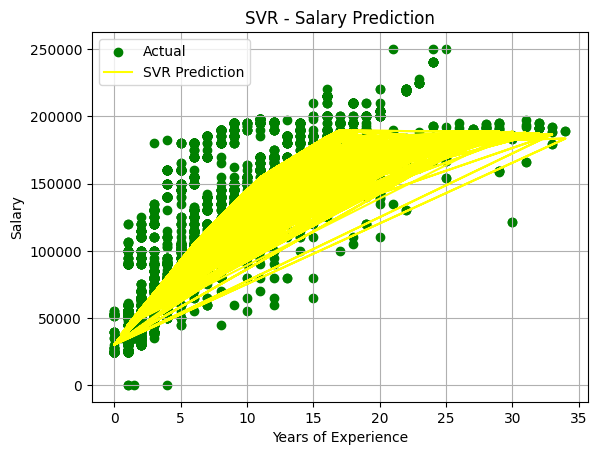

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='green', label='Actual')
plt.plot(X, y_pred, color='yellow', label='SVR Prediction')
plt.title("SVR - Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

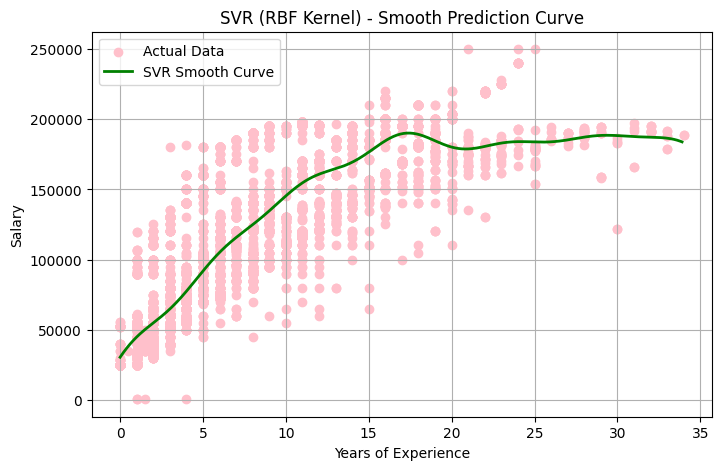

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X_grid = np.arange(min(X.ravel()), max(X.ravel()), 0.1)
X_grid = X_grid.reshape(-1, 1)

X_grid_scaled = sc_X.transform(X_grid)

y_grid_scaled = svr.predict(X_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='pink', label='Actual Data')
plt.plot(X_grid, y_grid, color='green', label='SVR Smooth Curve', linewidth=2)
plt.title("SVR (RBF Kernel) - Smooth Prediction Curve")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()


Evaluate Model Performance

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 759013901.8514212
RMSE: 27550.20692937571
R² Score: 0.7275580175081495


Kernal

compare kernals using code

Kernel : {kernel.upper()| R² Score: {score:.f}


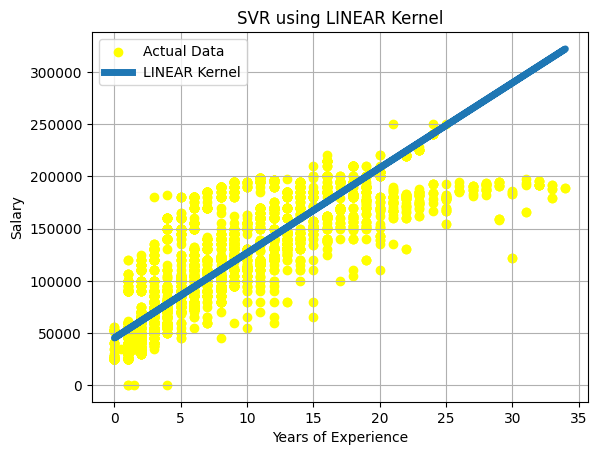

Kernel : {kernel.upper()| R² Score: {score:.f}


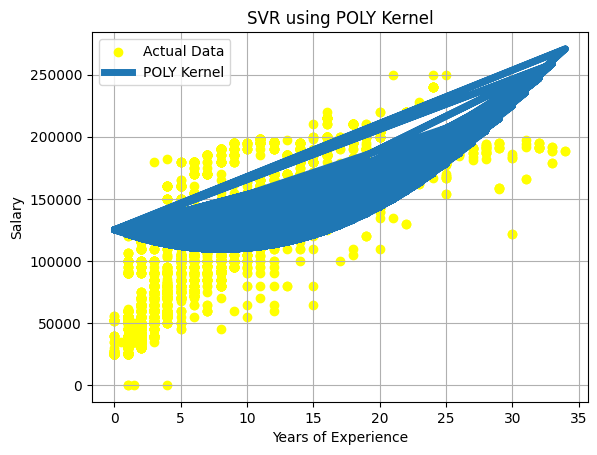

Kernel : {kernel.upper()| R² Score: {score:.f}


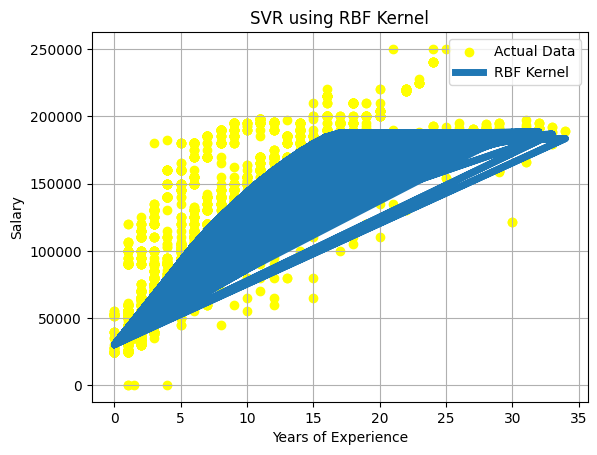

In [24]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X =df[["Years of Experience"]].values
y =df[["Salary"]].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y).ravel()

kernels = ['linear' , 'poly', 'rbf']
for kernel in kernels:
  if kernel == 'poly':
    model = SVR(kernel=kernel,degree=2)
  else:
    model = SVR(kernel=kernel)

  model.fit(X_scaled, y_scaled)


  y_pred_scaled = model.predict(X_scaled)
  y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

  score =r2_score(y,y_pred)
  print("Kernel : {kernel.upper()| R² Score: {score:.f}")
  plt.scatter(X, y, color='yellow', label='Actual Data')
  plt.plot(X, y_pred, label=f'{kernel.upper()} Kernel', linewidth=5)
  plt.title(f'SVR using {kernel.upper()} Kernel')
  plt.xlabel("Years of Experience")
  plt.ylabel("Salary")
  plt.grid(True)
  plt.legend()
  plt.show()

Understanding C and epsilon in SVR

In [25]:
SVR(C=1)
SVR(C=100)

SVR(C=100)

In [26]:
SVR(epsilon=0.1)
SVR(epsilon=1.0)

SVR(epsilon=1.0)

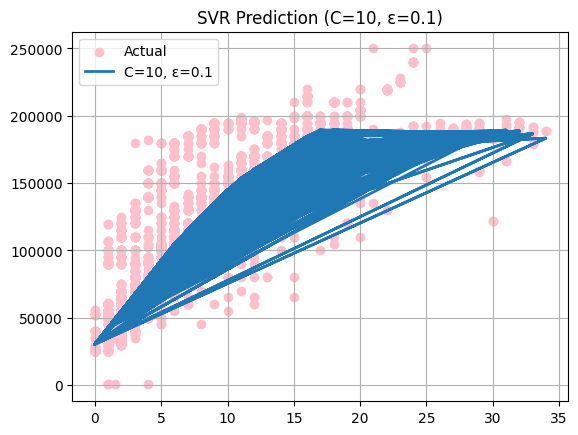

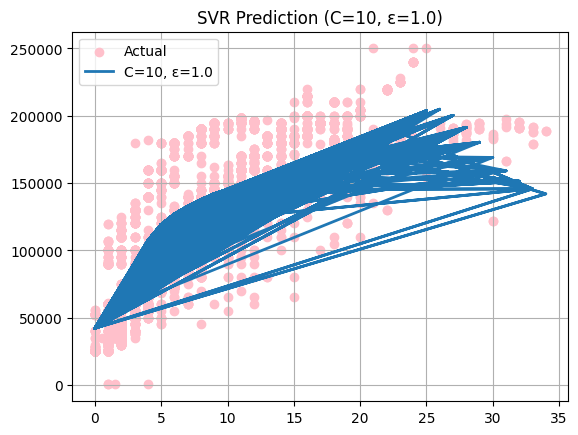

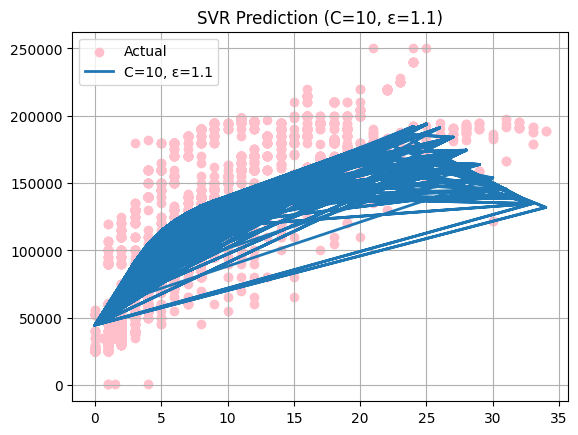

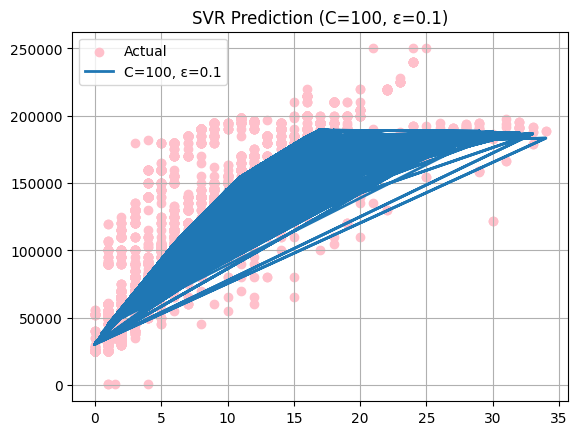

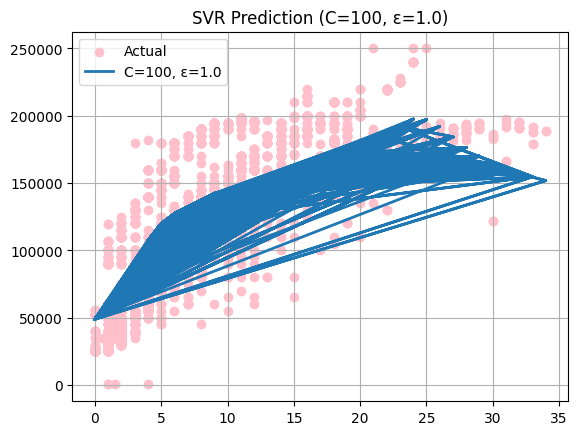

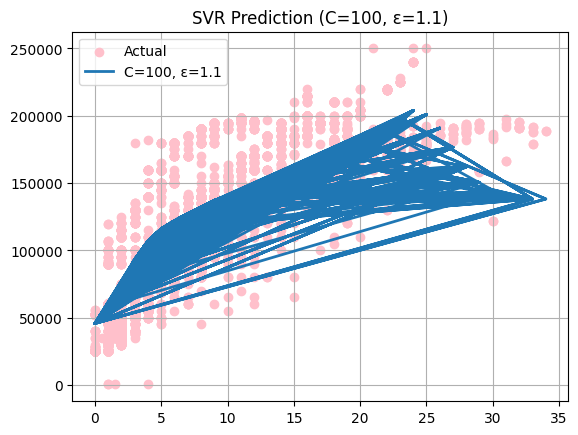

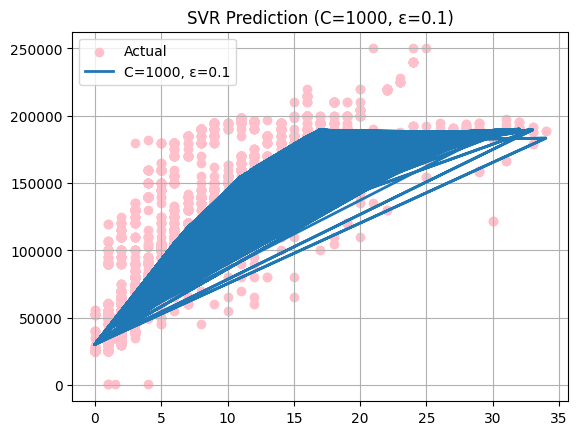

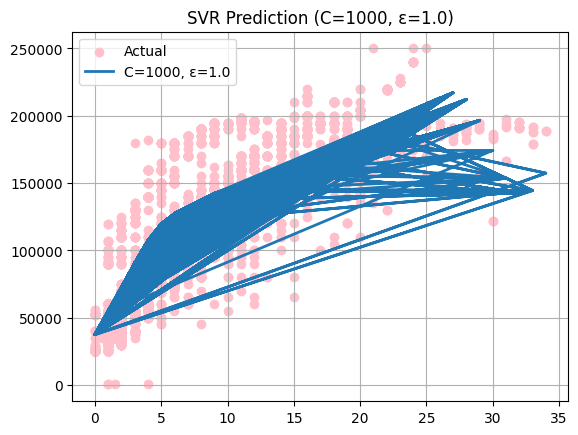

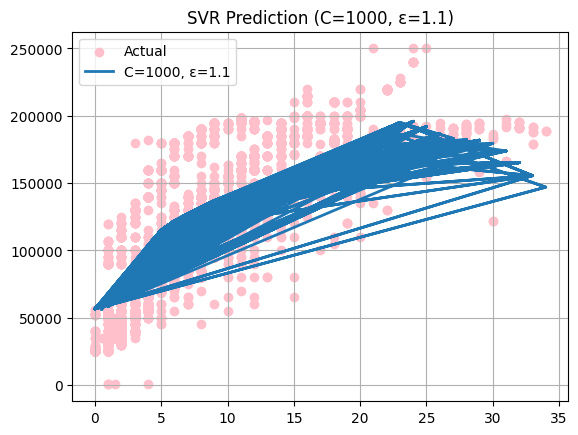

In [27]:
C_values =[10,100,1000]
epsilon_values =[0.1,1.0,1.1]
for c in C_values:
  for eps in epsilon_values:
    model = SVR(kernel='rbf',C=c ,epsilon=eps)
    model.fit(X_scaled, y_scaled)
    y_pred = sc_y.inverse_transform(model.predict(X_scaled).reshape(-1, 1))

    plt.scatter(X,y, color='pink', label='Actual')
    plt.plot(X, y_pred, label=f'C={c}, ε={eps}', linewidth=2)
    plt.title(f'SVR Prediction (C={c}, ε={eps})')
    plt.xlabel =("Years of Experience")
    plt.ylabel =("Salary")
    plt.legend()
    plt.grid(True)
    plt.show()


Real-World Prediction

In [28]:
exp = [[6.5]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1, 1))

print(f"Predicted Salary for 6.5 years: ₹{salary[0][0]:,.2f}")

Predicted Salary for 6.5 years: ₹110,694.67


Kernel: LINEAR | R² Score: 0.6326


TypeError: 'str' object is not callable

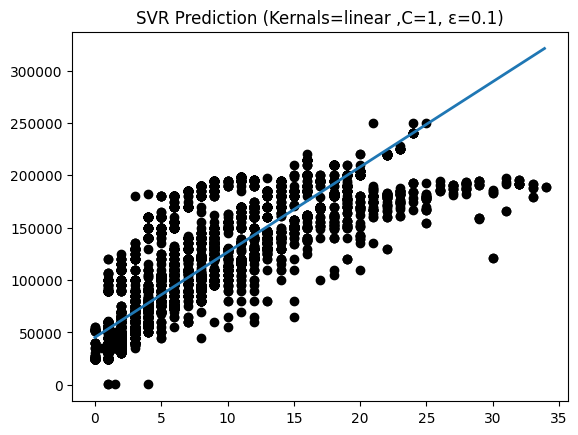

In [29]:
import numpy as np

C_values = [1, 10, 100]
epsilon_values = [0.1, 0.5, 1.0]
kernels =['linear','rbf']

X_grid = np.arange(min(X.ravel()), max(X.ravel()), 0.1)
X_grid = X_grid.reshape(-1, 1)

X_grid_scaled = sc_X.transform(X_grid)

for kernel in kernels:
 for c in C_values:
   for eps in epsilon_values:
         # Train SVR model
            model = SVR(kernel=kernel, C=c, epsilon=eps)
            model.fit(X_scaled, y_scaled)

            # Predictions on all data points (for plotting)
            y_pred_scaled = model.predict(X_scaled)
            y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

            y_grid_scaled = model.predict(X_grid_scaled)
            y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))

            score = r2_score(y, y_pred)
            print(f"Kernel: {kernel.upper()} | R² Score: {score:.4f}")

            plt.scatter(X,y,color='black',label='Actual')
            plt.plot(X_grid, y_grid, label=f'C={c}, ε={eps}', linewidth=2)
            plt.title(f'SVR Prediction (Kernals={kernel} ,C={c}, ε={eps})')
            plt.xlabel("YearsExperience")
            plt.ylabel("Salary")
            plt.legend()
            plt.grid(True)
            plt.show()

In [9]:
exp = [[2]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1, 1))

print(f"Predicted Salary for 2 years: ₹{salary[0][0]:,.2f}")

NameError: name 'sc_X' is not defined

In [ ]:
exp = [[5]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1, 1))

print(f"Predicted Salary for 5 years: ₹{salary[0][0]:,.2f}")

Predicted Salary for 5 years: ₹91,789.78


In [ ]:
exp = [[9]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1, 1))

print(f"Predicted Salary for 9 years: ₹{salary[0][0]:,.2f}")

Predicted Salary for 9 years: ₹134,728.47
